In [93]:
import numpy as np
from matplotlib import pylab as plt
from scipy import linalg

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

$ f(x) = \sin(x / 5) * \exp(x / 10) + 5 * \exp (-x / 2) $ 

In [94]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

\begin{equation*}
 \begin{cases}
    w_0 + w_1x_1 + w_2x_1^2 + \dots + w_nx_1^n =  f(x_1), 
   \\
    \dots
    \\
    w_0 + w_1x_{n+1} + w_2x_{n+1}^2 + \dots + w_nx_{n+1}^n =  f(x_{n+1}).
 \end{cases}
\end{equation*}

In [95]:
x = np.arange(1, 15.1, 0.1)

\begin{equation*}
 \begin{cases}
    w_0 + w_1x_1 =  f(x_1), 
   \\
    w_0 + w_1x_{15} =  f(x_{15}).
 \end{cases}
\end{equation*}

In [96]:
a1 = np.array([[1, 1], [1, 15]])
x1 = np.array([f(1), f(15)])

m1 = linalg.solve(a1 , x1)

y1 = m1[0] + m1[1] * x

\begin{equation*}
 \begin{cases}
    w_0 + w_1x_1 + w_2x_1^2 =  f(x_1), 
   \\
    w_0 + w_1x_8 + w_2x_8^2 =  f(x_8),
   \\
    w_0 + w_1x_{15} + w_2x_{15}^2 =  f(x_{15}).
 \end{cases}
\end{equation*}

In [97]:
a2 = np.array([[1, 1, 1], [1, 8, 8**2], [1, 15, 15**2]])
x2 = np.array([f(1), f(8), f(15)])

m2 = linalg.solve(a2 , x2)

y2 = m2[0] + m2[1] * x + m2[2] * (x**2)

\begin{equation*}
 \begin{cases}
    w_0 + w_1x_1 + w_2x_1^2 + w_3x_1^3 =  f(x_1), 
   \\
    w_0 + w_1x_4 + w_2x_4^2 + w_3x_4^3 =  f(x_4), 
   \\
    w_0 + w_1x_{10} + w_2x_{10}^2 + w_3x_{10}^3 =  f(x_{10}), 
   \\
    w_0 + w_1x_{15} + w_2x_{15}^2 + w_3x_{15}^3 =  f(x_{15}).
 \end{cases}
\end{equation*}

In [101]:
a3 = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15 ** 2, 15**3]])
x3 = np.array([f(1), f(4), f(10), f(15)])

m3 = linalg.solve(a3 , x3)

y3 = m3[0] + m3[1] * x + m3[2] * (x**2) + m3[3] * (x**3)

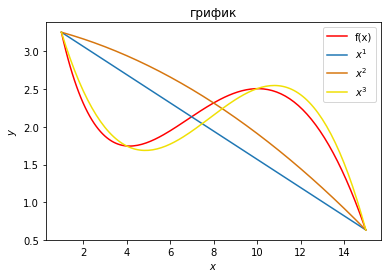

In [102]:
plt.plot(x, f(x), 'r', label = 'f(x)')
plt.plot(x, y1, 'tab:blue', label = '$ x^1 $')
plt.plot(x, y2, '#D6760F', label = '$ x^2 $')
plt.plot(x, y3, '#F0E005', label = '$ x^3 $')

plt.legend(loc=1)
plt.xlabel('$ x $')
plt.ylabel('$ y $')
plt.title('грифик');

In [132]:
a = ''
for i in m3:
    a += f'{round(i, 2)} '
a = a[:-1]

In [133]:
with open('submission-2.txt', 'w') as f:
    f.write(a)